In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import wandb
useWandb = True

In [19]:
%env "WANDB_NOTEBOOK_NAME" "datasetExplorationReport"

env: "WANDB_NOTEBOOK_NAME"="datasetExplorationReport"


In [20]:
if useWandb:
    wandb.login() # This should work automatically after the first time. For the first time you will need an API key.
    '''
    Initiating a run:
    project: The name of the project. Needs to be common between group members.
    entity: The name of the group. ce8-840
    name: The name of the run. Should be a good descriptor of the contents.
    '''
    #wandb.init(project="avs8-840-deep-learning-mini-project", entity='ce8-840', name='DatasetExploration',
    #        tags=["DatasetExploration"], notes="First dataset exploration run.")
    wandb.init(project="test_2", entity='ce8-840', name='DatasetExploration5',
            tags=["DatasetExploration"], notes="First dataset exploration run.")

# Original Paper of Dataset
Orlandic, L., Teijeiro, T. & Atienza, D. The COUGHVID crowdsourcing dataset, a corpus for the study of large-scale cough analysis algorithms. Sci Data 8, 156 (2021). [https://doi.org/10.1038/s41597-021-00937-4](https://doi.org/10.1038/s41597-021-00937-4)

# Samples in the dataset
First we load the metadata csv and display it. We can see that the entire dataset has 27550 rows, meaning there are 27550 sampels. 

In [21]:
DF = pd.read_csv("dataset/metadata_compiled.csv")
DF

,uuid,datetime,cough_detected,SNR,latitude,longitude,age,gender,respiratory_condition,fever_muscle_pain,...,quality_4,cough_type_4,dyspnea_4,wheezing_4,stridor_4,choking_4,congestion_4,nothing_4,diagnosis_4,severity_4
0,00014dcc-0f06-4c27-8c7b-737b18a2cf4c,2020-11-25T18:58:50.488301+00:00,0.0155,7.326171,48.9,2.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00039425-7f3a-42aa-ac13-834aaa2b6b92,2020-04-13T21:30:59.801831+00:00,0.9609,16.151433,31.3,34.8,15.0,male,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0007c6f1-5441-40e6-9aaf-a761d8f2da3b,2020-10-18T15:38:38.205870+00:00,0.1643,16.217201,NaN,NaN,46.0,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0009eb28-d8be-4dc1-92bb-907e53bc5c7a,2020-04-12T04:02:18.159383+00:00,0.9301,20.146058,40.0,-75.1,34.0,male,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0012c608-33d0-4ef7-bde3-75a0b1a0024e,2020-04-15T01:03:59.029326+00:00,0.0482,0.000000,-16.5,-71.5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27545,fff30afc-db62-4408-a585-07ca9a254fcc,2020-11-05T08:26:04.219206+00:00,0.9698,11.109221,40.7,29.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27546,fff3ff61-2387-4139-938b-539db01e6be5,2020-06-28T21:28:21.530881+00:00,0.5257,43.932829,51.6,-0.2,NaN,female,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27547,fff474bf-39a4-4a61-8348-6b992fb5e439,2020-04-10T05:10:36.787070+00:00,0.1945,27.702036,-39.0,-68.1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27548,fffaa9f8-4db0-46c5-90fb-93b7b014b55d,2020-04-13T18:58:26.954663+00:00,0.0243,8.825849,41.0,28.8,50.0,male,True,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Number of Classes and Samples Per Class
There are 51 columns in the dataset. However, according the dataset paper UUID, datetime and cough_detected cannot be a target of a prediction model. This means that any of the 48 remaining labels can be used as a classification target. We choose to work with the status label which is the self-reported COVID-19 diagnosis. It has one of three classes:
- Healthy
- Symptomatic
- COVID_19

And the number of samples per class are:

In [22]:
DF["status"].value_counts()
if useWandb:
    wandb.run.log({"Status_class_dist_table": dict(DF["status"].value_counts())})

This can be shown in a bar plot:

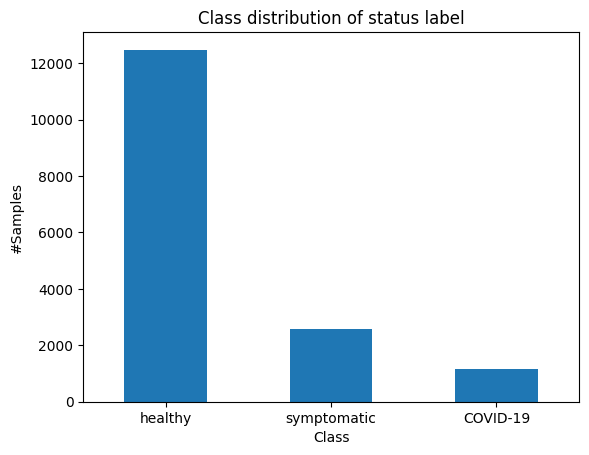

In [23]:
saveDir = "Status_class_dist.png"
Fig, ax = plt.subplots()
DF2 = DF["status"].value_counts()
DF2.plot.bar(ax=ax)
ax.set_title("Class distribution of status label")
ax.tick_params(axis='x', labelrotation=0)
ax.set_xlabel("Class")
ax.set_ylabel("#Samples")
Fig.savefig(saveDir, dpi=200, bbox_inches="tight")
if useWandb:
    wandb.run.log({"Status_class_dist": wandb.Image(saveDir)})
    data = [[label, val] for (label, val) in zip(DF2.keys(), DF2.values)]
    table = wandb.Table(data=data, columns = ["Class", "NumSamples"])
    wandb.log({"Status_class_dist" : wandb.plot.bar(table, "Class", "NumSamples",
                               title="Class distribution of status label")})

I can be seen that there are almost 10 times less COVID_19 samples than healthy samples. Leading to a class distribution of 1/11 if only working with those two classes.

# Playing a Random Sample from Each Status Class

Healthy sample:

In [24]:
x, sr = librosa.load("dataset/04fedb0b-3f11-4cc4-b1ef-c9919fdfbe78.webm")
ipd.Audio(x, rate=sr)
if useWandb:
    wandb.run.log({"Healthy_sample": wandb.Audio(x, sr)})

/tmp/ipykernel_23584/3764508168.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("dataset/04fedb0b-3f11-4cc4-b1ef-c9919fdfbe78.webm")
/home/mdalal/Documents/AVS8-Files/Deep Learning/avs8-840-deep-learning-mini-project/venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Symptomatic sample:

In [25]:
x, sr = librosa.load("dataset/de2eb773-e0f9-4a5d-9df3-870ba5ce1dbf.webm")
ipd.Audio(x, rate=sr)
if useWandb:
    wandb.run.log({"Symptomatic_sample": wandb.Audio(x, sr)})

/tmp/ipykernel_23584/3517552962.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("dataset/de2eb773-e0f9-4a5d-9df3-870ba5ce1dbf.webm")
/home/mdalal/Documents/AVS8-Files/Deep Learning/avs8-840-deep-learning-mini-project/venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Covid positive sample:

In [26]:
x, sr = librosa.load("dataset/ff8363d2-016d-4738-9499-4c62480886fb.webm")
ipd.Audio(x, rate=sr)
if useWandb:
    wandb.run.log({"COVID_sample": wandb.Audio(x, sr)})

/tmp/ipykernel_23584/2889637061.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = librosa.load("dataset/ff8363d2-016d-4738-9499-4c62480886fb.webm")
/home/mdalal/Documents/AVS8-Files/Deep Learning/avs8-840-deep-learning-mini-project/venv/lib/python3.11/site-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


# Effect of Data Distribution
The amount of COVID_19 samples is an order of magnitude less compared to the healthy class, while symptomatic is also around 5 times less than healthy. This will cause class imbalance problems when training the classifier. These problems can lead to the model achieving high accuracy by only predicting the samples as healthy, since almost 80% of the data has healthy labels.

## Over and Undersampling data


Many methods exist to address class imbalance. Two of them are:
- Over-sampling the lower classes by making new sample using replication, augmentation or interpolation of samples. Interpolation of samples can be a difficult task using raw audio files, as the audio can be quite different in both length and content.
- Under-sampling the higher classes by removal of samples. This of course leads to a great reduction to the amount of data that can be used to train and test the model.

Another way to address this imbalance is through the loss function:
- $f_{\beta}$ loss would put more weight into either precision or recall. This can be benificial to a medical diagnosis problem, as sometimes a false negative has a much greater impact than a false positive. Therefore, using an f-score with $\beta > 1$ would be benificial to the classification problem.
- Simple class weighting in L2-loss, where instead of giving equal weights to all classes, the weights are adjusted so that classes with less samples get a larger weight.

# Choice of Samples and Labels
The number of samples in each of these label can be shown as follows:

In [27]:
DF.notna().sum(axis=0)

uuid                     27550
datetime                 27550
cough_detected           27550
SNR                      27550
latitude                 16084
longitude                16084
age                      15218
gender                   16224
respiratory_condition    16224
fever_muscle_pain        16224
status                   16224
quality_1                  820
cough_type_1               802
dyspnea_1                  820
wheezing_1                 820
stridor_1                  820
choking_1                  820
congestion_1               820
nothing_1                  820
diagnosis_1                802
severity_1                 802
quality_2                  820
cough_type_2               801
dyspnea_2                  820
wheezing_2                 820
stridor_2                  820
choking_2                  820
congestion_2               820
nothing_2                  820
diagnosis_2                802
severity_2                 802
quality_3                  820
cough_ty

It is possible to display this information in a bar plot:

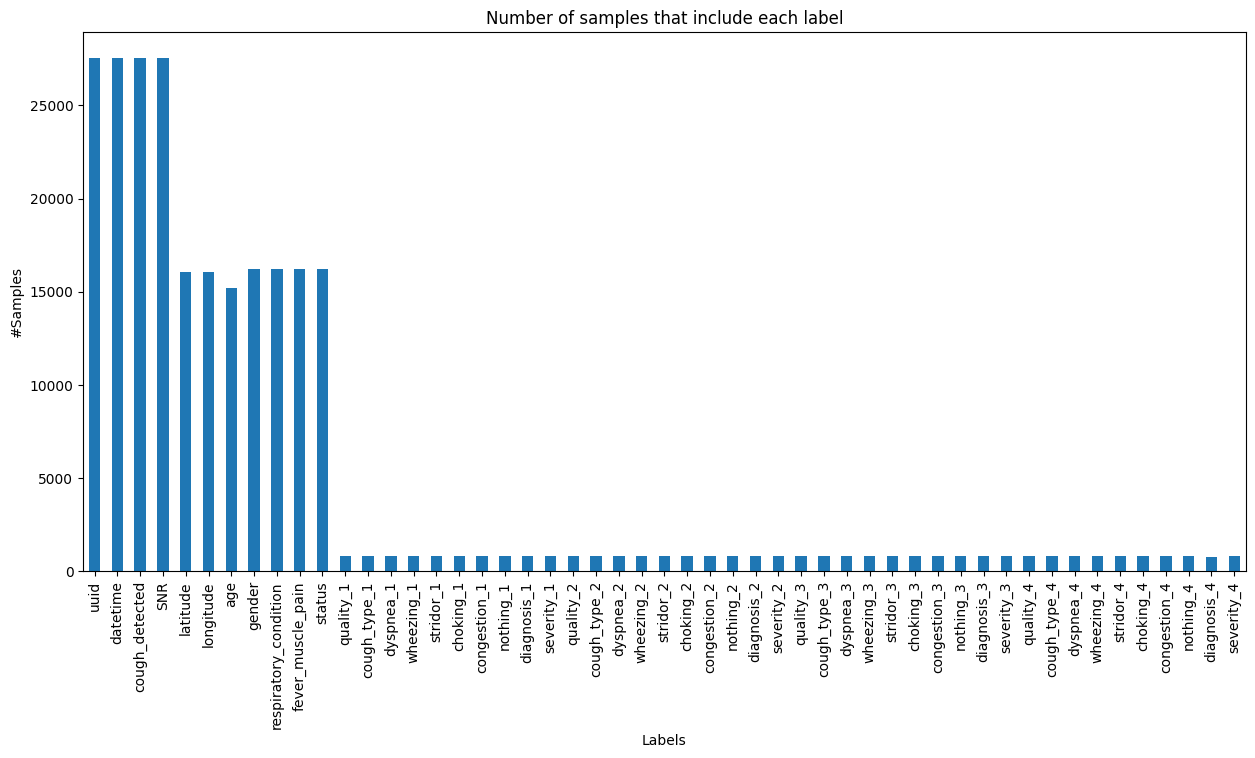

In [28]:
saveDir = "Num_samples_per_labels.png"
Fig, ax = plt.subplots(figsize=(15,7))
DF2 = DF.notna().sum(axis=0)
DF2.plot.bar(ax=ax)
ax.set_title("Number of samples that include each label")
ax.set_xlabel("Labels")
ax.set_ylabel("#Samples")
Fig.savefig(saveDir, dpi=200, bbox_inches="tight")
if useWandb:
    wandb.run.log({"Num_samples_per_labels": wandb.Image(saveDir)})
    data = [[label, val] for (label, val) in zip(DF2.keys(), DF2.values)]
    DF2 = DF2.to_frame(name="#Samples")
    DF2.index.name = "Labels"
    DF2 = DF2.reset_index()
    table = wandb.Table(dataframe=DF2)
    wandb.log({"Num_samples_per_labels" : wandb.plot.bar(table, "Label", "#Samples",
                               title="Number of samples that include each label")})

Some important details from the analysis of the dataset are:
- All samples have UUID, Datetime, cough_detected and SNR value. However, not all samples have the rest of the labels.
- The numbered labels are expert opinions, numbered from 1 to 4 corresponding to the 4 experts. More info about these labels can be found in the paper.
- The results of a combination analysis shows that if a sample has a gender label, then it also has respiratory_condition, muscle_fever_pain and status labels. Furthermore, if it has an age label than it also has the aformentioned four.
- Not all audio files actually has coughs in them. The cough-detected values is the results of a cough detector developed by the dataset makers. In the dataset paper it is suggested to only use data with a cough_detected value above 0.8, as that leads to 95% precision from their cough detector.

## Analysis of cough_detected labels
An analysis of the values in the cough_detected labels can be benificial to the decision of the samples to be used. First the distribution of the samples according to their cough_detected labels is plotted:

Samples with probability under 0.8:  12425
Samples with probability above 0.8:  15125


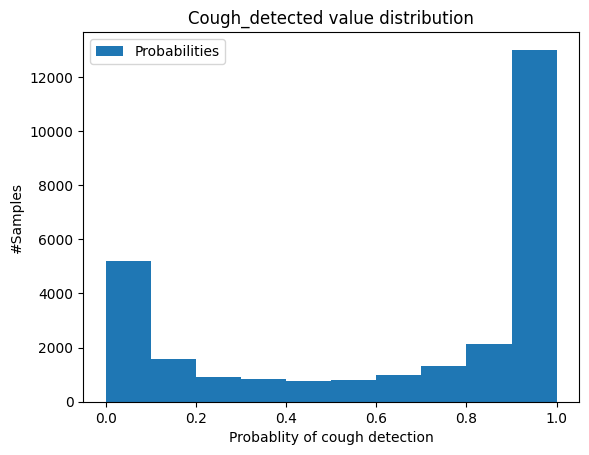

In [29]:
saveDir = "cough_detected_dist.png"
Fig, ax = plt.subplots()
DF2 = DF["cough_detected"].to_frame(name="Probabilities")
#DF["cough_detected"].plot.hist(bins=10, ax=ax)
DF2.plot.hist(bins=10, ax=ax)
ax.set_title("Cough_detected value distribution")
ax.tick_params(axis='x', labelrotation=0)
ax.set_xlabel("Probablity of cough detection")
ax.set_ylabel("#Samples")
Fig.savefig(saveDir, dpi=200, bbox_inches="tight")
print("Samples with probability under 0.8: ", (DF["cough_detected"] < 0.8).sum())
print("Samples with probability above 0.8: ", (DF["cough_detected"] >= 0.8).sum())
if useWandb:
    wandb.run.log({"cough_detected_dist": wandb.Image(saveDir)})
    table = wandb.Table(dataframe=DF2)
    #wandb.log({"cough_detected_dist_table": table})
    wandb.log({"cough_detected_dist" : wandb.plot.histogram(table, "Probabilities",
                            title="Cough_detected value distribution")})

It can be seen that almost half the data has a cough_detection probability under 0.8. However, by taking a look at the same distribution for data that have status labels we see that this ratio drops closer to a third:

Samples with probability under 0.8 and status labels:  5405
Samples with probability above 0.8 and status labels:  10819


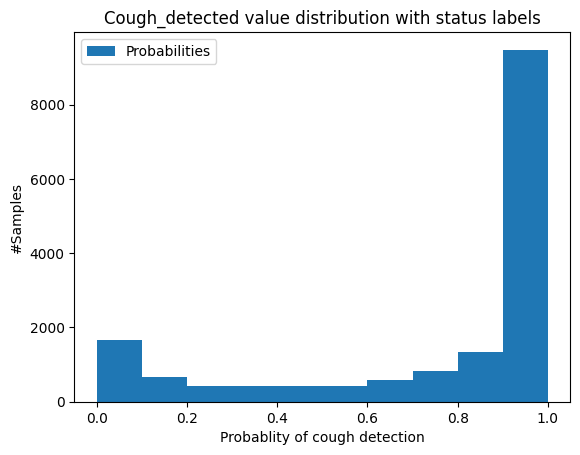

In [30]:
saveDir = "cough_detected_dist_with_status.png"
Fig, ax = plt.subplots()
DF2 = DF[DF.notna()["status"]]["cough_detected"].to_frame(name="Probabilities")
#DF[DF.notna()["status"]]["cough_detected"].plot.hist(bins=10, ax=ax)
DF2.plot.hist(bins=10, ax=ax)
ax.set_title("Cough_detected value distribution with status labels")
ax.tick_params(axis='x', labelrotation=0)
ax.set_xlabel("Probablity of cough detection")
ax.set_ylabel("#Samples")
Fig.savefig(saveDir, dpi=200, bbox_inches="tight")
print("Samples with probability under 0.8 and status labels: ", (DF[DF.notna()["status"]]["cough_detected"] < 0.8).sum())
print("Samples with probability above 0.8 and status labels: ", (DF[DF.notna()["status"]]["cough_detected"] >= 0.8).sum())
if useWandb:
    wandb.run.log({"cough_detected_dist_with_status": wandb.Image(saveDir)})
    table = wandb.Table(dataframe=DF2)
    #wandb.log({"cough_detected_dist_with_status_table": table})
    wandb.log({"cough_detected_dist_with_status" : wandb.plot.histogram(table, "Probabilities",
                            title="Cough_detected value distribution with status labels")})

In [31]:
DF2

,Probabilities
1,0.9609
2,0.1643
3,0.9301
5,0.9968
7,0.0306
...,...
27542,1.0000
27543,0.9784
27544,0.7154
27546,0.5257


While looking at samples that also have the age label, it can be seen that the ratio is similiar with a loss of around 500 samples. It is possible to predict the age of these 500 samples using either an average, median or a simple machine learning regressor.

Samples with probability under 0.8 and age labels:  4927
Samples with probability above 0.8 and age labels:  10291


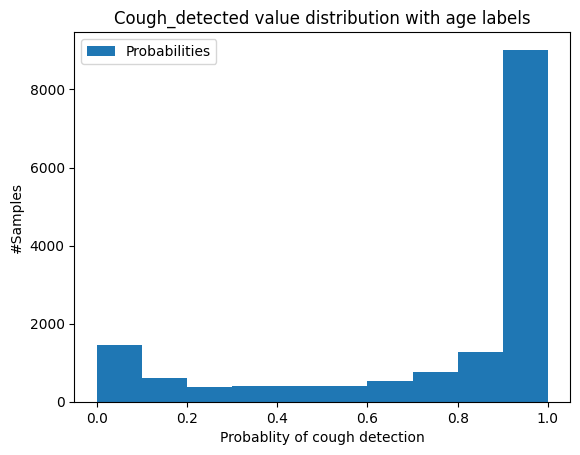

In [32]:
saveDir = "cough_detected_dist_with_age.png"
Fig, ax = plt.subplots()
DF2 = DF[DF.notna()["age"]]["cough_detected"].to_frame(name="Probabilities")
#DF[DF.notna()["age"]]["cough_detected"].plot.hist(bins=10, ax=ax)
DF2.plot.hist(bins=10, ax=ax)
ax.set_title("Cough_detected value distribution with age labels")
ax.tick_params(axis='x', labelrotation=0)
ax.set_xlabel("Probablity of cough detection")
ax.set_ylabel("#Samples")
Fig.savefig(saveDir, dpi=200, bbox_inches="tight")
print("Samples with probability under 0.8 and age labels: ", (DF[DF.notna()["age"]]["cough_detected"] < 0.8).sum())
print("Samples with probability above 0.8 and age labels: ", (DF[DF.notna()["age"]]["cough_detected"] >= 0.8).sum())
if useWandb:
    wandb.run.log({"cough_detected_dist_with_age": wandb.Image(saveDir)})
    table = wandb.Table(dataframe=DF2)
    #wandb.log({"cough_detected_dist_with_age_table": table})
    wandb.log({"cough_detected_dist_with_age" : wandb.plot.histogram(table, "Probabilities",
                            title="Cough_detected value distribution with age labels")})

The importance of these 500 samples can be seen by the status classes they belong to. If they are mostly healthy, then removing them would address the class imbalance problem:

In [33]:
print("Class distribution of samples with cough_detection above 0.8:")
print(DF[DF["status"].notna() & (DF["cough_detected"] > 0.8)]["status"].value_counts())
if useWandb:
    wandb.run.log({"Status_class_dist_over_0.8": dict(DF[DF["status"].notna() & (DF["cough_detected"] > 0.8)]["status"].value_counts())})
print("Class distributions of lost samples by removing samples without age label:")
print(DF[DF["age"].isna() & DF["status"].notna() & (DF["cough_detected"] > 0.8)]["status"].value_counts())
if useWandb:
    wandb.run.log({"Status_class_dist_over_0.8_with_Age": dict(DF[DF["age"].isna() & DF["status"].notna() & (DF["cough_detected"] > 0.8)]["status"].value_counts())})

Class distribution of samples with cough_detection above 0.8:
status
healthy        8298
symptomatic    1820
COVID-19        699
Name: count, dtype: int64
Class distributions of lost samples by removing samples without age label:
status
healthy        395
COVID-19        91
symptomatic     42
Name: count, dtype: int64


From this it can be seen that a largeer percentage amount of COVID-19 samples would be lost compared to the other classes. Therefore, removing the samples without age labels is not an option.

## Sample selection decision
From this analysis the following decision is made:
- Only samples with cough_detected over 0.8 will be used
- The 4306 samples without status labels will be used to train a self-supervised learning model
- The 10819 samples with status labels will be used to train the ViT, where samples without age labels will be filled in using either mean, median or regression.
- The transformer will use pre-processed audio and status as class-embedding. The model will try and predict the three different classes (Healthy, Symptomatic and COVID-19). Class imbalance will be addressed by weighted classification.
- If time allows the age, gender, respiratory_condition and fever_muscle_pain labels will also be used. The idea is to concatenate them to the embeddings coming out of the transformer before being passed to the classifier head.

In [34]:
wandb.finish()

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job
